<a href="https://colab.research.google.com/github/azmihasan/sklearn/blob/main/VotingRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Voting Regressor implementation***

Voting Regressor implementation that uses 3 different Regressors:

*   Linear Regression
*   Random Forest Regressor
*   Gradien Boosting Regressor 

# ***About Dataset***
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

# ***About Regressor***
***LinearRegression*** fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

A ***random forest*** is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

***Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT)*** is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

The idea behind the ***VotingRegressor*** is to combine 
conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

# ***Resources:***

The dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

Voting Regressor:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html

Linear Regression:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Random Forest Regressor:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


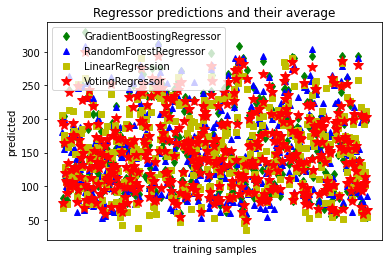

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Loading some example data
X, y = load_diabetes(return_X_y=True)

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X, y)
x_range = np.linspace(X.min(), X.max(),len(X))
pred1 = reg1.predict(X)
pred2 = reg2.predict(X)
pred3 = reg3.predict(X)
y_range = ereg.predict(X)

plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(y_range, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

# using plotly to get interactive data visualization
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_traces(go.Scatter(x=x_range, y=pred1, name = 'Gradient Boosting Regressor', mode = 'markers'))
fig.add_traces(go.Scatter(x=x_range, y=pred2, name = 'Random Forest Regressor', mode = 'markers'))
fig.add_traces(go.Scatter(x=x_range, y=pred3, name = 'Linear Regression', mode = 'markers'))
fig.add_traces(go.Scatter(x=x_range, y=y_range, name = 'Voting Regressor', mode = 'markers'))

fig.show()